#**Initial data analysis**

In [1]:
import pandas as pd

# Load the Excel file
file_path = '/content/SN Data Analyst Task_ Data Set.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Full name,Campaign Name,Status,Recurrence,Currency,Amount,Running total,Gift Aid,Opt in,Source,Medium,Campaign,Donation date
0,Laci Baldwin,All Eyes on Gaza,Success,One-off,GBP,40.0,NaN,Yes,No,NaN,NaN,NaN,2024-07-17 13:46:00
1,Dorian Richardson,All Eyes on Gaza,Success,One-off,GBP,25.0,NaN,Yes,No,Instagram,Organic,Gaza,2024-07-17 12:42:00
2,Darrell West,All Eyes on Gaza,Success,One-off,GBP,25.0,NaN,Yes,No,NaN,NaN,NaN,2024-07-17 00:09:00
3,kyle Bryan,All Eyes on Gaza,Success,One-off,USD,25.0,NaN,No,Yes,Instagram,Organic,Gaza,2024-07-16 23:12:00
4,Aden Ayers,General Funds,Success,One-off,GBP,10.0,NaN,Yes,No,Instagram,Organic,Gaza,2024-07-16 21:43:00


#**Data Cleaning**

In [3]:
# Split the "Full name" into "First Name" and "Last Name"
data[['First Name', 'Last Name']] = data['Full name'].str.split(' ', n=1, expand=True)

# Filter out rows where "Opt in" is "No"
opted_in_data = data[data['Opt in'] == 'Yes']

# Display the cleaned data
opted_in_data.head()

,Full name,Campaign Name,Status,Recurrence,Currency,Amount,Running total,Gift Aid,Opt in,Source,Medium,Campaign,Donation date,First Name,Last Name
3,kyle Bryan,All Eyes on Gaza,Success,One-off,USD,25.0,NaN,No,Yes,Instagram,Organic,Gaza,2024-07-16 23:12:00,kyle,Bryan
5,Trace Leach,General Funds,Success,One-off,GBP,50.0,NaN,Yes,Yes,Email,Email,Gaza_kicker,2024-07-16 17:34:00,Trace,Leach
7,Mohammed Lopez,All Eyes on Gaza,Success,One-off,GBP,50.0,NaN,Yes,Yes,NaN,NaN,NaN,2024-07-16 13:37:00,Mohammed,Lopez
8,Jayvon Cordova,All Eyes on Gaza,Success,One-off,GBP,50.0,NaN,Yes,Yes,Instagram,Organic,Gaza,2024-07-16 12:39:00,Jayvon,Cordova
10,Chasity Cohen,All Eyes on Gaza,Success,One-off,GBP,60.0,NaN,Yes,Yes,Email,Email,Gaza_kicker,2024-07-16 10:37:00,Chasity,Cohen


#**CHANGING CURRENCY**

In [13]:
# For simplicity, let's assume the following exchange rates:
# 1 GBP = 1.26 USD
# 1 EUR = 1.08 USD
# 1 USD = 1 USD

exchange_rates = {'GBP': 1.26, 'EUR': 1.08, 'USD': 1}

# Convert all donation amounts to USD
opted_in_data['Amount (USD)'] = opted_in_data.apply(lambda row: row['Amount'] * exchange_rates[row['Currency']], axis=1)

# Sort the data by "Donation date"
opted_in_data_sorted = opted_in_data.sort_values(by='Donation date')

# Calculate the running total
opted_in_data_sorted['Running total (USD)'] = opted_in_data_sorted['Amount (USD)'].cumsum()

# Display the sorted data with the running total
opted_in_data_sorted[['Donation date', 'First Name', 'Last Name', 'Amount (USD)', 'Running total (USD)']].head()

<ipython-input-13-4a4da2895a76>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opted_in_data['Amount (USD)'] = opted_in_data.apply(lambda row: row['Amount'] * exchange_rates[row['Currency']], axis=1)


,Donation date,First Name,Last Name,Amount (USD),Running total (USD)
2988,2024-06-24 15:16:00,Deon,Lucas,31.5,31.5
2983,2024-06-24 15:24:00,Libby,Gregory,31.5,63.0
2981,2024-06-24 15:25:00,Elisa,Clarke,16.2,79.2
2976,2024-06-24 15:31:00,Jesus,Robertson,63.0,142.2
2975,2024-06-24 15:32:00,Darryl,Riddle,12.6,154.8


from matplotlib import pyplot as plt
_df_16['Amount (USD)'].plot(kind='hist', bins=20, title='Amount (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Running total (USD)'].plot(kind='hist', bins=20, title='Running total (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('First Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('Last Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Amount (USD)', y='Running total (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Donation date']
  ys = series['Amount (USD)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('Donation date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('First Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='First Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Donation date')
_ = plt.ylabel('Amount (USD)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Donation date']
  ys = series['Amount (USD)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('Donation date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Last Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Last Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Donation date')
_ = plt.ylabel('Amount (USD)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Donation date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Donation date'}, axis=1)
              .sort_values('Donation date', ascending=True))
  xs = counted['Donation date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('Donation date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('First Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='First Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Donation date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Donation date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Donation date'}, axis=1)
              .sort_values('Donation date', ascending=True))
  xs = counted['Donation date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Donation date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Last Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Last Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Donation date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['Amount (USD)'].plot(kind='line', figsize=(8, 4), title='Amount (USD)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Running total (USD)'].plot(kind='line', figsize=(8, 4), title='Running total (USD)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Last Name'].value_counts()
    for x_label, grp in _df_27.groupby('First Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('First Name')
_ = plt.ylabel('Last Name')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['First Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='Amount (USD)', y='First Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Last Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Amount (USD)', y='Last Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['First Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Running total (USD)', y='First Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['Last Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Running total (USD)', y='Last Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
# Display the updated dataset with the daily running total
print(opted_in_data_sorted[['Donation date', 'First Name', 'Last Name', 'Amount (USD)', 'Running total (USD)']].head(10))

           Donation date First Name  Last Name  Amount (USD)  \
2988 2024-06-24 15:16:00       Deon      Lucas          31.5   
2983 2024-06-24 15:24:00      Libby    Gregory          31.5   
2981 2024-06-24 15:25:00      Elisa     Clarke          16.2   
2976 2024-06-24 15:31:00      Jesus  Robertson          63.0   
2975 2024-06-24 15:32:00     Darryl     Riddle          12.6   
2973 2024-06-24 15:34:00   Isabelle     Monroe          18.9   
2968 2024-06-24 15:38:00    Alannah     Walton         100.0   
2967 2024-06-24 15:41:00       Drew     Hodges          31.5   
2966 2024-06-24 15:42:00     Maggie    Garrett         126.0   
2964 2024-06-24 15:46:00    Gilbert      Scott          63.0   

      Running total (USD)  
2988                 31.5  
2983                 63.0  
2981                 79.2  
2976                142.2  
2975                154.8  
2973                173.7  
2968                273.7  
2967                305.2  
2966                431.2  
2964           

In [20]:
# Calculate running total
data['Running Total'] =data['Amount (USD)'].cumsum()
print(data['Running Total'])

0          31.5000
1          63.0000
2          79.2000
3         142.2000
4         154.8000
           ...    
1465    87611.3324
1466    87674.3324
1467    87737.3324
1468    87800.3324
1469    87825.3324
Name: Running Total, Length: 1470, dtype: float64


#**THE NEW DATA SET**

In [9]:
import pandas as pd

# Load the Excel file
file_path = '/content/SN Data Analyst Task_ Data Set.xlsx'
data = pd.read_excel(file_path)

# Split the "Full name" into "First Name" and "Last Name"
# The split method takes a maximum of two positional arguments.
# We are removing the extra positional argument and keeping the keyword argument 'expand=True'
data[['First Name', 'Last Name']] = data['Full name'].str.split(' ', n=1, expand=True)

# Filter out rows where "Opt in" is "No"
opted_in_data = data[data['Opt in'] == 'Yes']

# Define the exchange rates
exchange_rates = {'GBP': 1.26, 'EUR': 1.08, 'USD': 1}

# Convert all donation amounts to USD
opted_in_data['Amount (USD)'] = opted_in_data.apply(lambda row: row['Amount'] * exchange_rates[row['Currency']], axis=1)

# Sort the data by "Donation date"
opted_in_data_sorted = opted_in_data.sort_values(by='Donation date')

# Convert 'Donation date' to a date-only format for daily aggregation
opted_in_data_sorted['Donation Date (Day)'] = opted_in_data_sorted['Donation date'].dt.date

# Group by the day and calculate the daily total and running total
daily_totals = opted_in_data_sorted.groupby('Donation Date (Day)')['Amount (USD)'].sum().reset_index()
daily_totals['Running Total (USD)'] = daily_totals['Amount (USD)'].cumsum()

# Merge the daily running total back into the original dataset
opted_in_data_sorted = opted_in_data_sorted.merge(daily_totals[['Donation Date (Day)', 'Running Total (USD)']],
                                                  on='Donation Date (Day)', how='left')

# Save the updated dataset to a new Excel file
opted_in_data_sorted.to_excel('Updated_Fundraising_Campaign_Data.xlsx', index=False)


<ipython-input-9-5f588f66e3f7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opted_in_data['Amount (USD)'] = opted_in_data.apply(lambda row: row['Amount'] * exchange_rates[row['Currency']], axis=1)


##**DATA VISUALIZATION FROM THE NEW DATA SET**



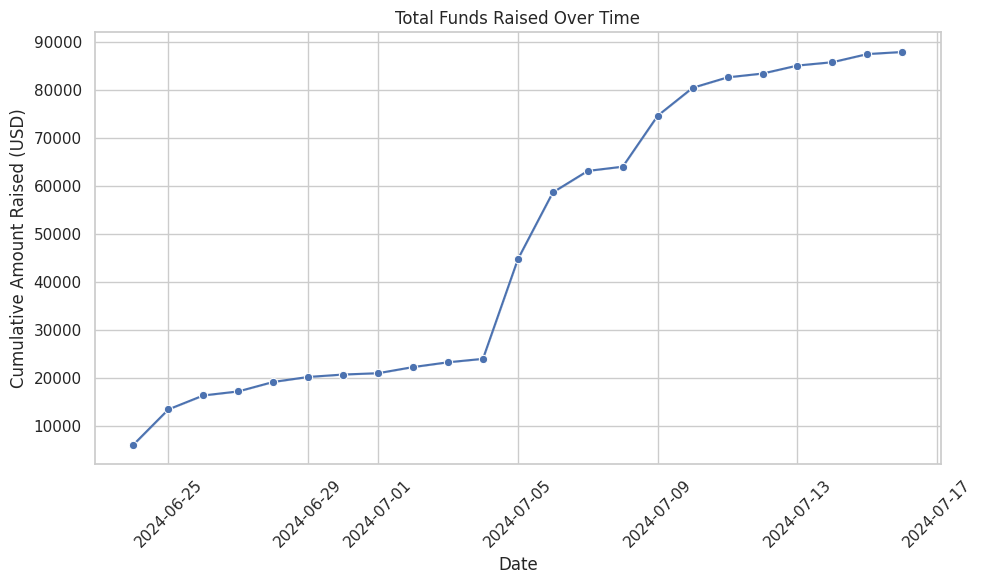

<ipython-input-12-c28e4504b86f>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Donation Date (Day)', y='Amount (USD)', data=data, ci=None)


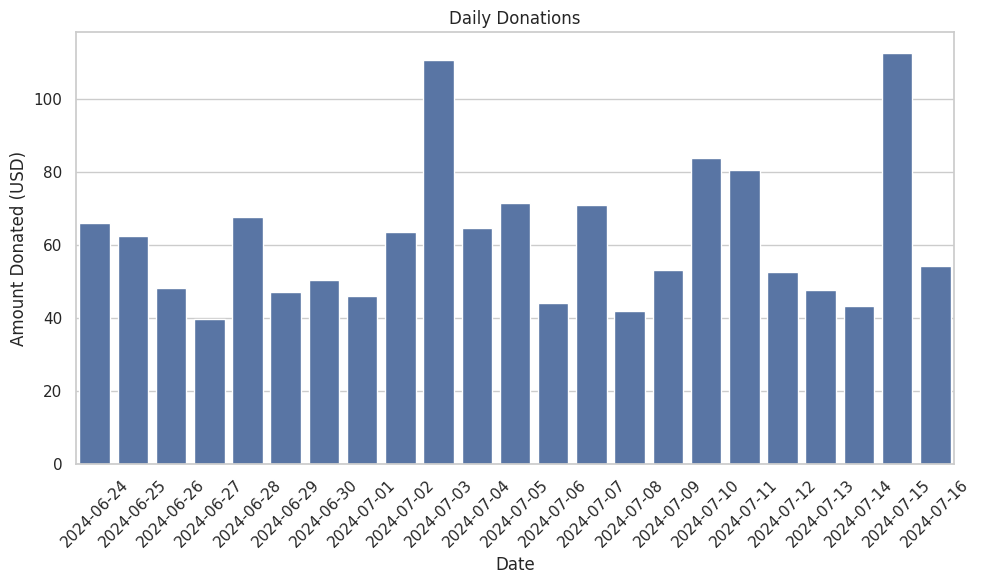

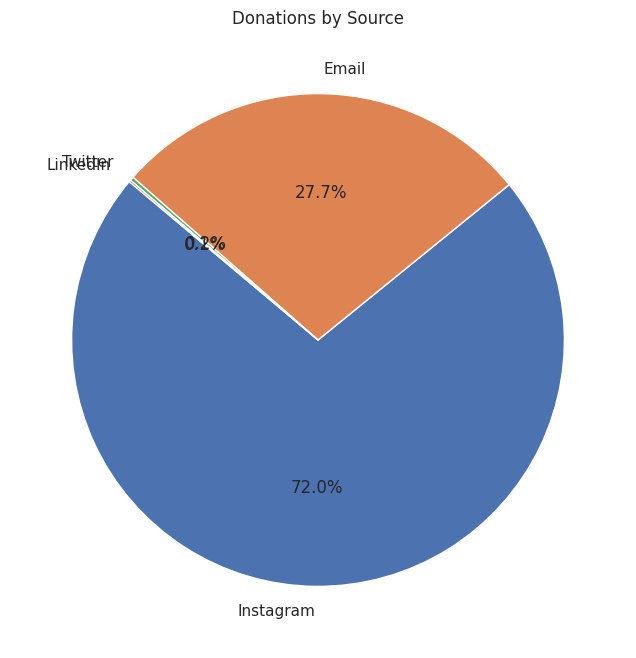

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated dataset
file_path = '/content/Updated_Fundraising_Campaign_Data.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Donation Date (Day)' to datetime for proper plotting
data['Donation Date (Day)'] = pd.to_datetime(data['Donation Date (Day)'])

# Set plot style
sns.set(style="whitegrid")

# 1. Total Funds Raised Over Time (Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Donation Date (Day)', y='Running Total (USD)', data=data, marker='o')
plt.title('Total Funds Raised Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Amount Raised (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Daily Donations (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Donation Date (Day)', y='Amount (USD)', data=data, ci=None)
plt.title('Daily Donations')
plt.xlabel('Date')
plt.ylabel('Amount Donated (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Donations by Source (Pie Chart)
source_data = data['Source'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(source_data, labels=source_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Donations by Source')
plt.show()

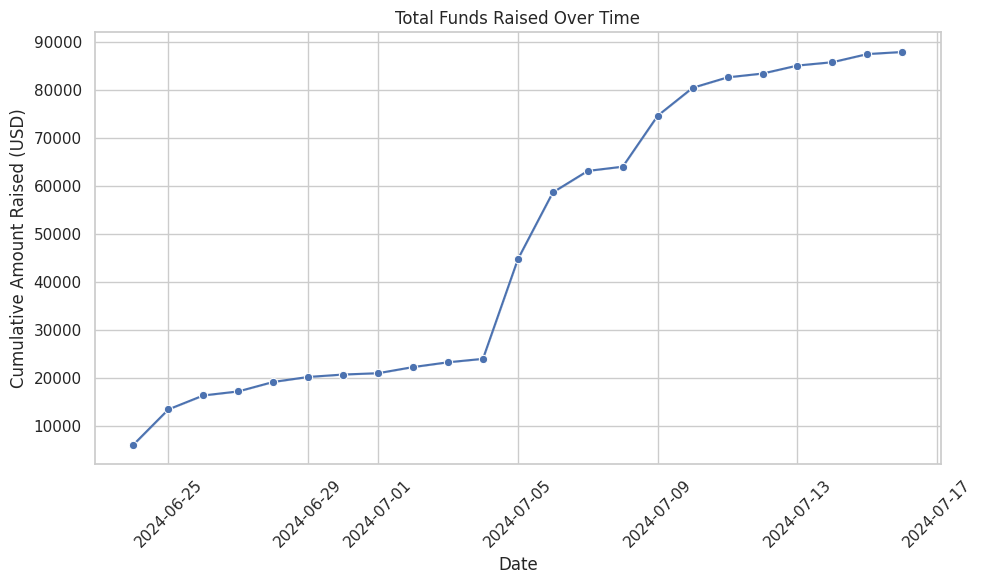

<ipython-input-18-baccb845dee1>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Donation Date (Day)', y='Amount (USD)', data=data, ci=None)


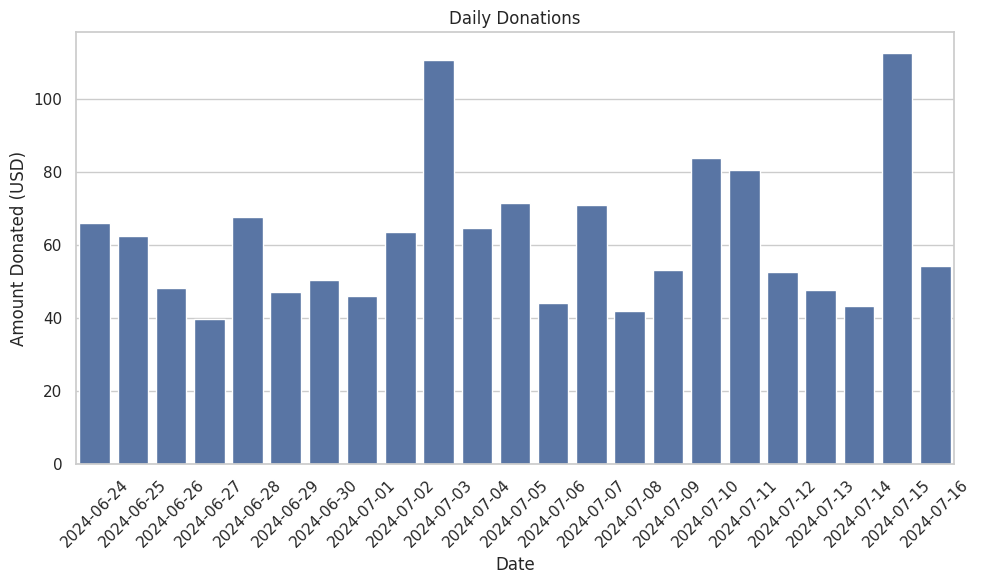

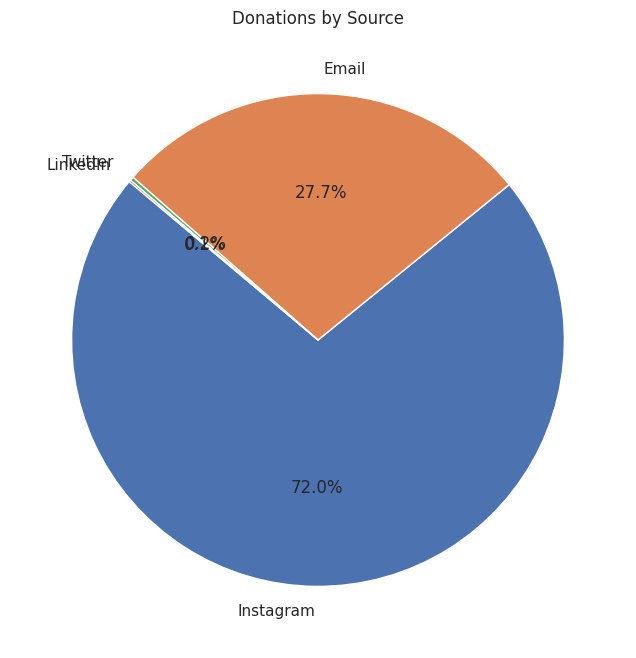

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas for reading Excel files

# Load the updated dataset (Corrected file path)
file_path = '/content/Updated_Fundraising_Campaign_Data.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Donation Date (Day)' to datetime for proper plotting
data['Donation Date (Day)'] = pd.to_datetime(data['Donation Date (Day)'])

# Set plot style
sns.set(style="whitegrid")

# 1. Total Funds Raised Over Time (Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Donation Date (Day)', y='Running Total (USD)', data=data, marker='o')
plt.title('Total Funds Raised Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Amount Raised (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Daily Donations (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Donation Date (Day)', y='Amount (USD)', data=data, ci=None)
plt.title('Daily Donations')
plt.xlabel('Date')
plt.ylabel('Amount Donated (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Donations by Source (Pie Chart)
source_data = data['Source'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(source_data, labels=source_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Donations by Source')
plt.show()